<marquee style='width: 100%; color: blue;'><b>This Notebook provides an example of how to do simple visualizations using Matplotlib.</b></marquee>

Importing Matplotlib

Click on the "Manage Packages" option in the Toolbar. This will open the Terminal window. In the Terminal window, you can find the instructions to install packages used by the python kernel through pip. To install "matplotlib" as a package, please type the following in the terminal:

#### .\python.exe -m pip install matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Basic Scatter Plot

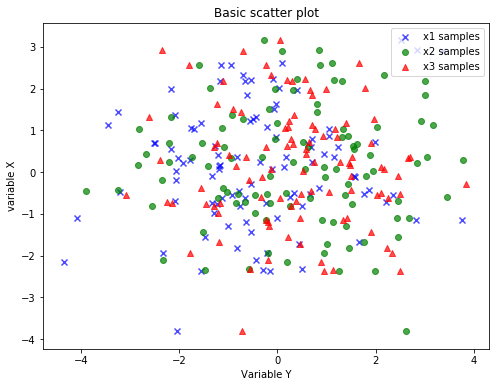

In [1]:
%matplotlib inline
# Generating a Gaussion dataset:
# creating random vectors from the multivariate normal distribution 
# given mean and covariance 
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[2,0],[0,2]])

x1_samples = np.random.multivariate_normal(mu_vec1, cov_mat1, 100)
x2_samples = np.random.multivariate_normal(mu_vec1+0.2, cov_mat1+0.2, 100)
x3_samples = np.random.multivariate_normal(mu_vec1+0.4, cov_mat1+0.4, 100)

# x1_samples.shape -> (100, 2), 100 rows, 2 columns

plt.figure(figsize=(8,6))
    
plt.scatter(x1_samples[:,0], x1_samples[:,1], marker='x', 
            color='blue', alpha=0.7, label='x1 samples')
plt.scatter(x2_samples[:,0], x1_samples[:,1], marker='o', 
            color='green', alpha=0.7, label='x2 samples')
plt.scatter(x3_samples[:,0], x1_samples[:,1], marker='^', 
            color='red', alpha=0.7, label='x3 samples')
plt.title('Basic scatter plot')
plt.ylabel('variable X')
plt.xlabel('Variable Y')
plt.legend(loc='upper right')

plt.show()

## Scatter plot with labels

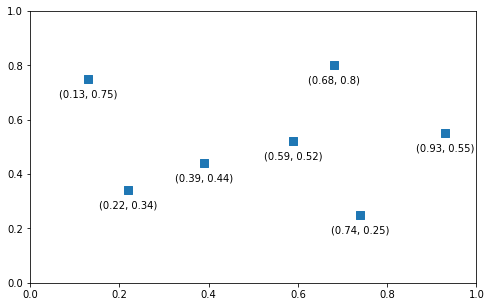

In [1]:
%matplotlib inline
x_coords = [0.13, 0.22, 0.39, 0.59, 0.68, 0.74, 0.93]
y_coords = [0.75, 0.34, 0.44, 0.52, 0.80, 0.25, 0.55]

fig = plt.figure(figsize=(8,5))
plt.scatter(x_coords, y_coords, marker='s', s=50)

for x, y in zip(x_coords, y_coords):
    plt.annotate(
        '(%s, %s)' %(x, y), 
        xy=(x, y), 
        xytext=(0, -10),
        textcoords='offset points', 
        ha='center', 
        va='top')

plt.xlim([0,1])
plt.ylim([0,1])
plt.show()

## Increasing point size with distance from the origin

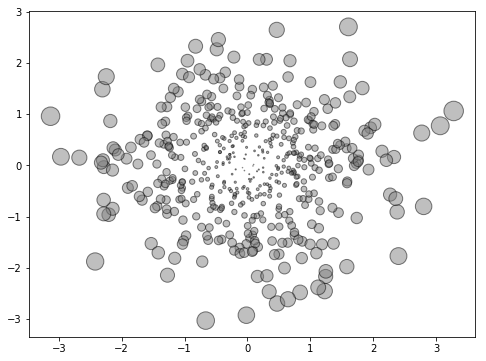

In [1]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))

# Generating a Gaussion dataset:
# creating random vectors from the multivariate normal distribution 
# given mean and covariance 
mu_vec1 = np.array([0,0])
cov_mat1 = np.array([[1,0],[0,1]])
X = np.random.multivariate_normal(mu_vec1, cov_mat1, 500)

R = X**2
R_sum = R.sum(axis=1)
plt.scatter(X[:, 0], X[:, 1], 
            color='gray', 
            marker='o', 
            s=32. * R_sum,
            edgecolor='black',
            alpha=0.5)
plt.show()

## Plot Normal Distribution in 3-D

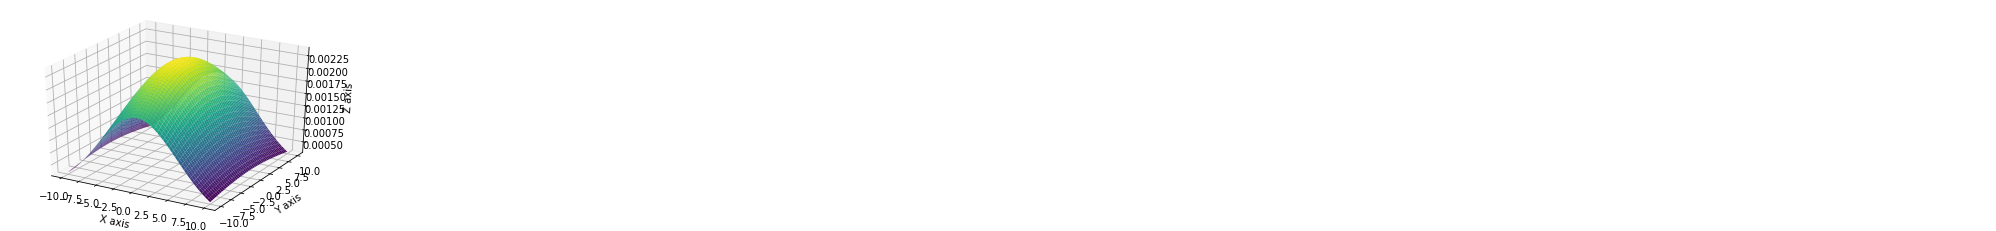

In [1]:
%matplotlib inline
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


#Parameters to set
mu_x = 0
variance_x = 3

mu_y = 0
variance_y = 15

#Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

## Scatter Masked

Mask some data points and add a line demarking masked regions.

In [1]:
%matplotlib inline
# Fixing random state for reproducibility
np.random.seed(19680801)
N = 100
r0 = 0.6
x = 0.9 * np.random.rand(N)
y = 0.9 * np.random.rand(N)
area = (20 * np.random.rand(N))**2  # 0 to 10 point radii
c = np.sqrt(area)
r = np.sqrt(x * x + y * y)
area1 = np.ma.masked_where(r < r0, area)
area2 = np.ma.masked_where(r >= r0, area)
plt.scatter(x, y, s=area1, marker='^', c=c)
plt.scatter(x, y, s=area2, marker='o', c=c)
# Show the boundary between the regions:
theta = np.arange(0, np.pi / 2, 0.01)
plt.plot(r0 * np.cos(theta), r0 * np.sin(theta))

plt.show()